In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Analysis of Crawled Data



In [2]:
# Load data from CSV file
data = pd.read_csv("/content/combined_labelled.csv", encoding="ISO-8859-1")
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,game,labels
0,G_F758,FALSE,343,Hogwarts Legacy\r\nFlight the Good Flight (SIL...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0
1,gjvarkey,FALSE,44,Add leads from Facebook Lead Ads to a Google S...,13/2/2023 7:17,0,0,0.0,https://twitter.com/gjvarkey/status/1625031302...,"['cats', 'happydinoday', 'shopping', 'aiartcom...",HGL,0.0
2,DeVinSimmons,FALSE,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],HGL,0.0
3,SirenWolfxx,FALSE,122,It's finally here! ð­ð¥¹ @twitchSIE #hp #ho...,13/2/2023 20:11,0,0,2.0,https://twitter.com/SirenWolfxx/status/1625226...,"['hp', 'hogwartlegacy', 'slytherin']",HGL,0.0
4,cozzboz,FALSE,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],HGL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94560,Abfun77,FALSE,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",ELR,NaN
94561,Vivern96,FALSE,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",ELR,NaN
94562,EllieCupcakes,FALSE,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",ELR,NaN
94563,Pinknotess,FALSE,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",ELR,NaN


In [3]:
# Remove duplicate tweets
data = data.drop_duplicates(subset=["rawContent"])
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,game,labels
0,G_F758,FALSE,343,Hogwarts Legacy\r\nFlight the Good Flight (SIL...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",HGL,0.0
1,gjvarkey,FALSE,44,Add leads from Facebook Lead Ads to a Google S...,13/2/2023 7:17,0,0,0.0,https://twitter.com/gjvarkey/status/1625031302...,"['cats', 'happydinoday', 'shopping', 'aiartcom...",HGL,0.0
2,DeVinSimmons,FALSE,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],HGL,0.0
3,SirenWolfxx,FALSE,122,It's finally here! ð­ð¥¹ @twitchSIE #hp #ho...,13/2/2023 20:11,0,0,2.0,https://twitter.com/SirenWolfxx/status/1625226...,"['hp', 'hogwartlegacy', 'slytherin']",HGL,0.0
4,cozzboz,FALSE,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],HGL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94560,Abfun77,FALSE,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",ELR,NaN
94561,Vivern96,FALSE,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",ELR,NaN
94562,EllieCupcakes,FALSE,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",ELR,NaN
94563,Pinknotess,FALSE,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",ELR,NaN


In [4]:
print("Shape of data =>",data.shape)

Shape of data => (94555, 12)


In [5]:
# Check for null tweets
data['rawContent'].isnull().sum()

0

GOW          22212
HGL          21686
Cyberpunk    15781
MHW          12559
ELR          11995
Stardew      10322
Name: game, dtype: int64


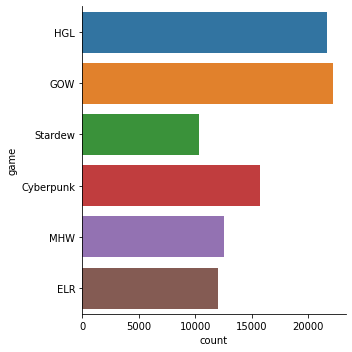

In [6]:
print(data["game"].value_counts())
plot = sb.catplot(y = "game", data = data, kind = "count")
plot.savefig("game_count.png", dpi=300, bbox_inches='tight')

In [7]:
GOW = data.loc[data['game'] == 'GOW']
HGL = data.loc[data['game'] == 'HGL']
Stardew = data.loc[data['game'] == 'Stardew']
Cyberpunk = data.loc[data['game'] == 'Cyberpunk']
MHW = data.loc[data['game'] == 'MHW']
ELR = data.loc[data['game'] == 'ELR']

#Overall Statistics

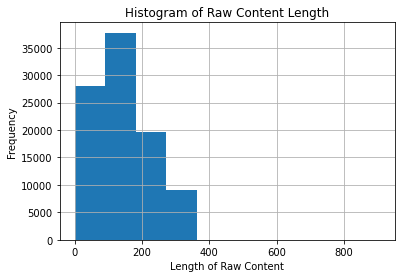

In [8]:
# Create a histogram of the length of the "rawContent" column in data
data['rawContent'].str.len().hist()
plt.title("Histogram of Raw Content Length")
plt.xlabel("Length of Raw Content")
plt.ylabel("Frequency")
plt.savefig("rawContent_length_hist.png", dpi=300, bbox_inches='tight')

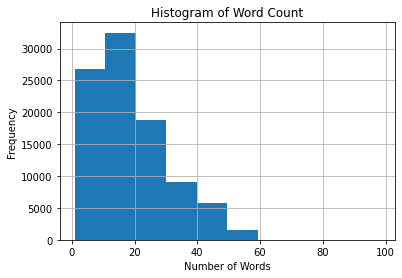

In [9]:
# Word count
data['rawContent'].str.split().map(lambda x: len(x)).hist()
plt.title("Histogram of Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig("word_count_hist.png", dpi=300, bbox_inches='tight')

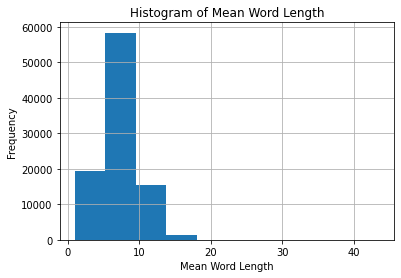

In [10]:
# Word Length
data['rawContent'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title("Histogram of Mean Word Length")
plt.xlabel("Mean Word Length")
plt.ylabel("Frequency")
plt.savefig("mean_word_length_hist.png", dpi=300, bbox_inches='tight')

In [11]:
stop=set(stopwords.words('english'))

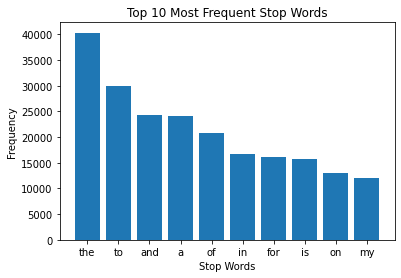

In [12]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus = []
check = data['rawContent'].str.split()
check = check.values.tolist()
corpus = [word for i in check for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*top)
plt.bar(x, y)
plt.title("Top 10 Most Frequent Stop Words")
plt.xlabel("Stop Words")
plt.ylabel("Frequency")
plt.savefig("stop_words_bar.png", dpi=300, bbox_inches='tight')

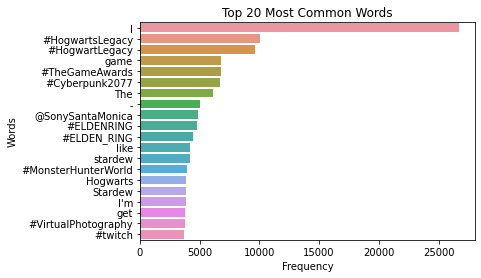

In [13]:
# Common words plot
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sb.barplot(x=y, y=x)
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.savefig("top_20_common_words_bar.png", dpi=300, bbox_inches='tight')

In [14]:
def plot_top_ngrams_barchart(text, n=2, output_filename=None):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_ngrams = _get_top_ngram(text, n)[:10]
    x, y = map(list, zip(*top_n_ngrams))
    sb.barplot(x=y, y=x)
    plt.title(f"Top {n}-grams")
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    if output_filename:
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')

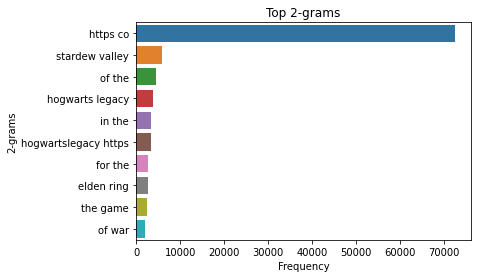

In [15]:
plot_top_ngrams_barchart(data['rawContent'],2)

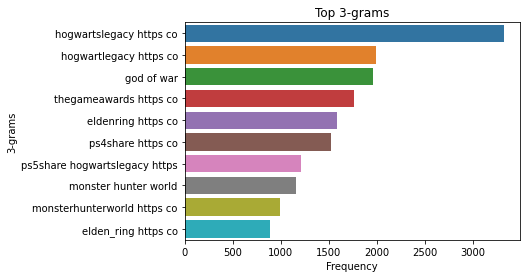

In [16]:
plot_top_ngrams_barchart(data['rawContent'],3)

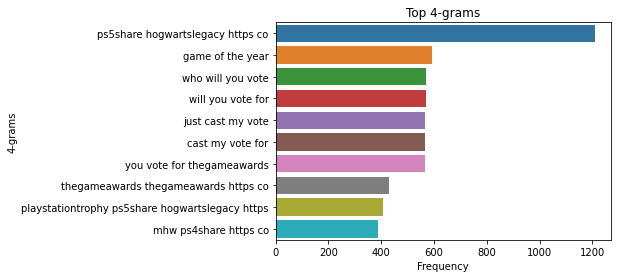

In [17]:
plot_top_ngrams_barchart(data['rawContent'],4)

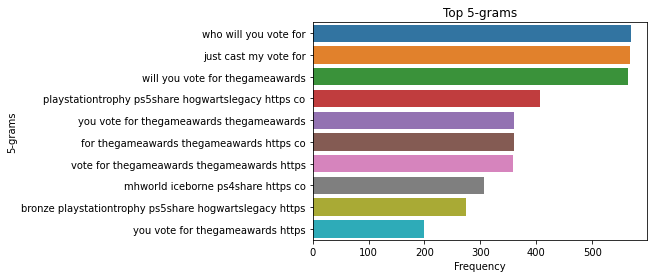

In [18]:
plot_top_ngrams_barchart(data['rawContent'],5)

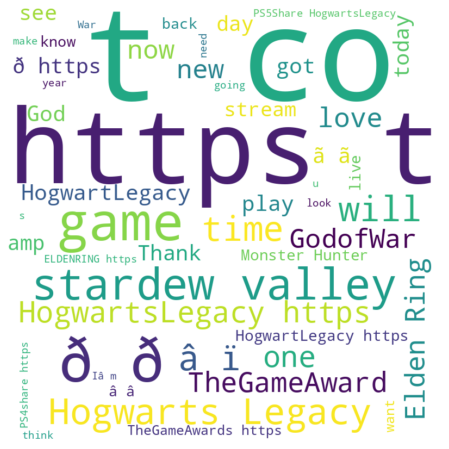

In [19]:
# Generate wordcloud from tweets - 50
wordcloud = WordCloud(width=800, height=800, background_color="white", max_words=50, contour_width=3, contour_color="steelblue")
wordcloud.generate(" ".join(data["rawContent"]))

# Display wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Save wordcloud as PNG file
plt.savefig("wordcloud_50.png", dpi=300)

plt.show()

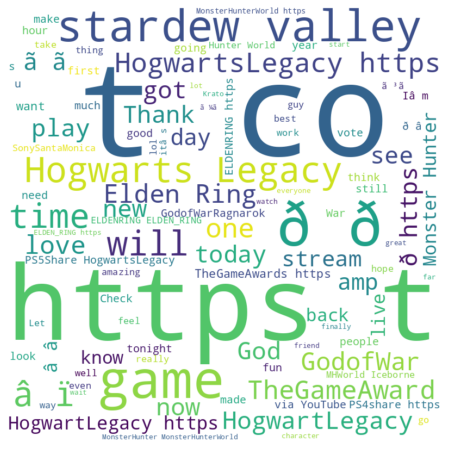

In [20]:
# Generate wordcloud from tweets - 100
wordcloud = WordCloud(width=800, height=800, background_color="white", max_words=100, contour_width=3, contour_color="steelblue")
wordcloud.generate(" ".join(data["rawContent"]))

# Display wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Save wordcloud as PNG file
plt.savefig("wordcloud_100.png", dpi=300)

plt.show()

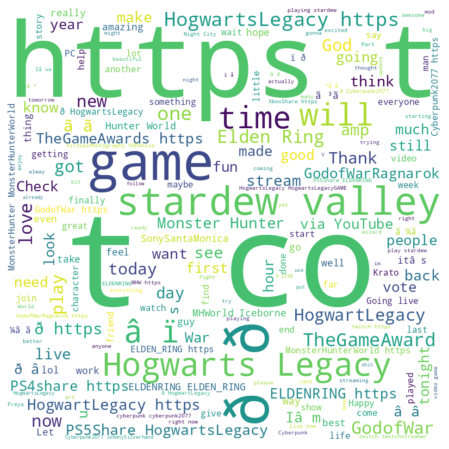

In [21]:
# Generate wordcloud from tweets - 200
wordcloud = WordCloud(width=800, height=800, background_color="white", max_words=200, contour_width=3, contour_color="steelblue")
wordcloud.generate(" ".join(data["rawContent"]))

# Display wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Save wordcloud as PNG file
plt.savefig("wordcloud_200.png", dpi=300)

plt.show()

In [22]:
# Replace 9.0 with 0.0 in "labels" column - accidentally added during labelling
data["labels"].replace(9.0, 0.0, inplace=True)

# Print updated value counts of labels
print(data["labels"].value_counts())

 0.0    5447
 1.0    1276
-1.0     607
Name: labels, dtype: int64


<ipython-input-22-d748e0e9dc42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"].replace(9.0, 0.0, inplace=True)


 0.0    5447
 1.0    1276
-1.0     607
Name: labels, dtype: int64


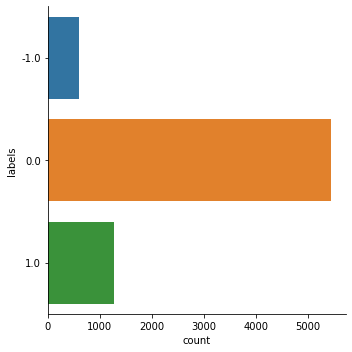

In [23]:
# Print value counts of labels
print(data["labels"].value_counts())

# Create countplot using Seaborn
fig = sb.catplot(y="labels", data=data, kind="count")

# Save countplot as PNG file
fig.savefig("labels_countplot.png", dpi=300)

# Show countplot
plt.show()

 0.0    592
 1.0    459
-1.0    342
Name: labels, dtype: int64


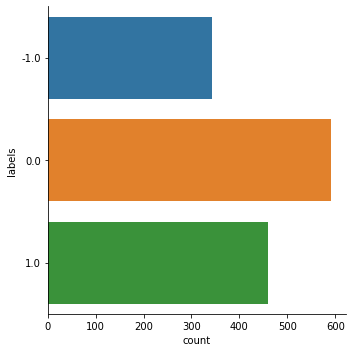

In [24]:
print(GOW["labels"].value_counts())
fig = sb.catplot(y = "labels", data = GOW, kind = "count")
fig.savefig("GOW_labels_countplot.png", dpi=300)

 0.0    1006
 1.0      68
-1.0      14
Name: labels, dtype: int64


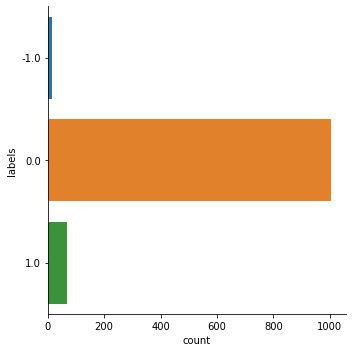

In [25]:
print(HGL["labels"].value_counts())
fig = sb.catplot(y = "labels", data = HGL, kind = "count")
fig.savefig("HGL_labels_countplot.png", dpi=300)

 0.0    1122
 1.0      66
-1.0      10
Name: labels, dtype: int64


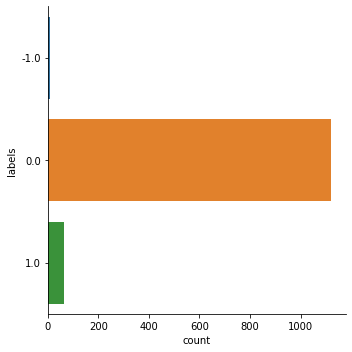

In [26]:
print(Stardew["labels"].value_counts())
fig = sb.catplot(y = "labels", data = Stardew, kind = "count")
fig.savefig("Stardew_labels_countplot.png", dpi=300)

 0.0    611
 1.0    406
-1.0    181
Name: labels, dtype: int64


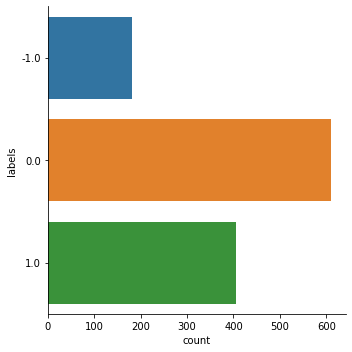

In [27]:
print(Cyberpunk["labels"].value_counts())
fig = sb.catplot(y = "labels", data = Cyberpunk, kind = "count")
fig.savefig("Cyberpunk_labels_countplot.png", dpi=300)

<ipython-input-28-d861f25c0f92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MHW["labels"].replace(9.0, 0.0, inplace=True)


 0.0    1140
 1.0     103
-1.0      12
Name: labels, dtype: int64


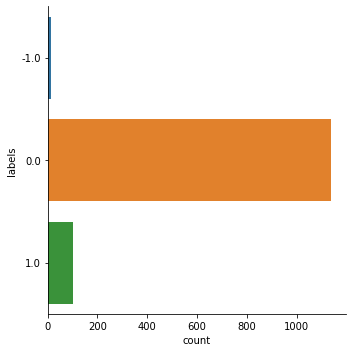

In [28]:
# Replace 9.0 with 0.0 in "labels" column - accidentally added during labelling
MHW["labels"].replace(9.0, 0.0, inplace=True)

print(MHW["labels"].value_counts())
fig = sb.catplot(y = "labels", data = MHW, kind = "count")
fig.savefig("MHW_labels_countplot.png", dpi=300)

 0.0    976
 1.0    174
-1.0     48
Name: labels, dtype: int64


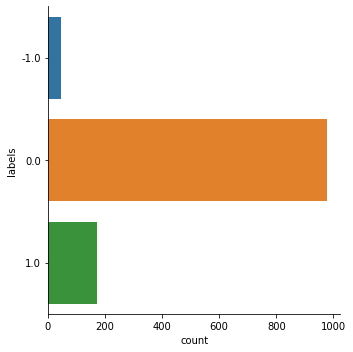

In [29]:
print(ELR["labels"].value_counts())
fig = sb.catplot(y = "labels", data = ELR, kind = "count")
fig.savefig("ELR_labels_countplot.png", dpi=300)